# Modelling

This notebook contains model training, data engineering and selection processes.



### Import Necessary Libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC


import timeit
import warnings
warnings.filterwarnings("ignore")

from functions import *

### Load dfs

In [2]:
# import libraries form csv files into pandas df
df = pd.read_csv('data_for_model.csv', usecols = ['review_rating' , 'Reviews_tokenize_join'])

In [3]:
# optimazation memory by converting the review_rating to category
df['target'] = df['review_rating'].astype('category')

In [4]:
# plot
df['review_rating'].plot.hist(bins=12, alpha=0.5)

In [6]:

df['target'].value_counts(normalize = True)


5    0.474172
4    0.264351
3    0.122715
1    0.069501
2    0.069261
Name: target, dtype: float64

In [6]:
#df.info()
# df['target'] = df['review_rating'].apply(lambda x: str(x))

In [22]:
# df['target'] = df['review_rating'].astype('category')

In [7]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25050 entries, 0 to 25049
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   review_rating          25050 non-null  int64   
 1   Reviews_tokenize_join  25050 non-null  object  
 2   target                 25050 non-null  category
dtypes: category(1), int64(1), object(1)
memory usage: 416.2+ KB


,review_rating,Reviews_tokenize_join,target
0,1,start say understand hard time city country en...,1
1,5,wonderful visit time park view thank upgrade l...,5
2,5,good hotel stay absolutely worth money view ce...,5
3,5,fantastic location spot step central park view...,5
4,5,amazing park view nicole staff professional fr...,5


## Data Engineering and Modelling




I am going to implement different classifiers to see which works best:

- Logistic Regression
- Decision Tree
- Random Forest
- Linear Support Vector Classification
- Multinomial Naive Bayes

In [11]:
def clf(model ,col1,col):
    start = timeit.timeit()
    """It takes two columns and a classifier, split the data into traing and testing, vectorize it, remove irrlevant features using and implemnt a ca
    classifier using a pipeline, return a dictionary with accuracy, precions and recall f_1 socre and running time"""

    X_train, X_test, y_train, y_test = train_test_split(df[col1], df[col] , test_size=0.3, random_state = 42)

    classification_model = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
                         ('chi',  SelectKBest(chi2, k=10000)),
                   ('clf', model)])

    classification_model.fit(X_train, y_train)
    
    preds = classification_model.predict(X_test)
    end = timeit.timeit()
    final_time = start - end

    list_names = ['Model','Accuracy_score','Recall_score','Precision_score','F1_score', 'Time']
    score_list = []
    accuracy = accuracy_score(y_test, preds)
    recall = recall_score(y_test, preds,average=None, pos_label='Good')
    precision = precision_score(y_test, preds,average=None, pos_label='Good')
    f_1 = f1_score(y_test , preds,average=None, pos_label='Good')
    final_time = start - end

    score_list.extend([model,accuracy,recall,precision,f_1,final_time])
    dictionary = dict(zip(list_names, score_list))
    return dictionary

### Logistic Regresion 

In [5]:
lg_multi_class = clf(LogisticRegression() , df ,'Reviews_tokenize_join', 'target')


In [6]:
lg_multi_class

{'Accuracy_score': '60.0%',
 'Recall_score': array([0.54420432, 0.03214286, 0.24946004, 0.39164619, 0.90588235]),
 'Precision_score': array([0.57708333, 0.3       , 0.37806874, 0.47412255, 0.67414051]),
 'F1_score': array([0.56016178, 0.05806452, 0.30058556, 0.42895587, 0.77301665]),
 'Time': 0.0030548040000013543}

### Mutinomial NB

In [7]:
nb_multi_class = clf(MultinomialNB(), df, 'Reviews_tokenize_join', 'target')

In [8]:
nb_multi_class

{'Accuracy_score': '47.0%',
 'Recall_score': array([0.01178782, 0.        , 0.00647948, 0.03587224, 0.99827834]),
 'Precision_score': array([1.        , 0.        , 0.09230769, 0.11908646, 0.50929586]),
 'F1_score': array([0.02330097, 0.        , 0.01210898, 0.05513595, 0.67448623]),
 'Time': 0.0029241939999984368}

### Decision Tree Classifier

In [9]:
dt_multi_class = clf(DecisionTreeClassifier(), df, 'Reviews_tokenize_join', 'target')

In [10]:
dt_multi_class

{'Accuracy_score': '46.0%',
 'Recall_score': array([0.32023576, 0.14464286, 0.21814255, 0.35872236, 0.66025825]),
 'Precision_score': array([0.37385321, 0.21259843, 0.23461092, 0.3417603 , 0.62172386]),
 'F1_score': array([0.34497354, 0.17215728, 0.22607722, 0.35003596, 0.64041191]),
 'Time': 0.0028145990000041365}

### Linear Support Vector Machine with stochastic gradient descent (SGD)


In [15]:
# clf(SGDClassifier())

In [16]:
# with cross validation
# clf(SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None))

In [17]:
# clf(SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None))

### Linear Support Vector Classification

In [11]:
svc_multi_class = clf(LinearSVC(),df, 'Reviews_tokenize_join', 'target')

In [12]:
svc_multi_class

{'Accuracy_score': '61.0%',
 'Recall_score': array([0.58742633, 0.14464286, 0.35529158, 0.40884521, 0.87058824]),
 'Precision_score': array([0.53680431, 0.34913793, 0.40220049, 0.49701314, 0.71658007]),
 'F1_score': array([0.56097561, 0.20454545, 0.37729358, 0.44863845, 0.78611219]),
 'Time': 0.003740172000000541}

### Random Forest Classifier

In [13]:
rf_multi_class = clf(RandomForestClassifier(),df, 'Reviews_tokenize_join', 'target')

In [14]:
rf_multi_class 

{'Accuracy_score': '53.0%',
 'Recall_score': array([0.33791749, 0.07678571, 0.16954644, 0.35380835, 0.82266858]),
 'Precision_score': array([0.4738292 , 0.29861111, 0.28390597, 0.38543897, 0.62502725]),
 'F1_score': array([0.39449541, 0.12215909, 0.21230561, 0.36894696, 0.71035679]),
 'Time': 0.00409076800000463}

### Results Summary


In [15]:
l= [lg_multi_class, dt_multi_class, nb_multi_class , svc_multi_class, rf_multi_class ]


In [34]:
# df_results = pd.DataFrame((i for i in l) , columns=['Model','Accuracy_score', 'Recall_score','Precision_score','F1_score','Time'] )
# df_results['Model'] = ['Logistic Regresion', 'Decision Tree Classifier', 'Mutinomial NB', 'Linear Support Vector Classification', 'Random Forest Classifier']
# df_results = df_results.set_index('Model')
# df_results

,Accuracy_score,Recall_score,Precision_score,F1_score,Time
Model,,,,,
Logistic Regresion,59.61%,"[0.5442043222003929, 0.03214285714285714, 0.24...","[0.5770833333333333, 0.3, 0.3780687397708674, ...","[0.5601617795753286, 0.058064516129032254, 0.3...",0.003744
Decision Tree Classifier,45.67%,"[0.3280943025540275, 0.13214285714285715, 0.22...","[0.3856812933025404, 0.2138728323699422, 0.230...","[0.3545647558386412, 0.16335540838852097, 0.22...",0.003864
Mutinomial NB,47.43%,"[0.011787819253438114, 0.0, 0.0064794816414686...","[1.0, 0.0, 0.09230769230769231, 0.119086460032...","[0.023300970873786405, 0.0, 0.0121089808274470...",0.003270
Linear Support Vector Classification,60.88%,"[0.587426326129666, 0.14464285714285716, 0.355...","[0.5368043087971275, 0.34913793103448276, 0.40...","[0.5609756097560975, 0.20454545454545456, 0.37...",0.004425
Random Forest Classifier,51.580000000000005%,"[0.3005893909626719, 0.06964285714285715, 0.17...","[0.4751552795031056, 0.2932330827067669, 0.288...","[0.3682310469314079, 0.11255411255411255, 0.21...",0.002815


In [16]:
df_results = table_results(l)
df_results

,Accuracy_score,Recall_score,Precision_score,F1_score,Time
Model,,,,,
Logistic Regresion,60.0%,"[0.5442043222003929, 0.03214285714285714, 0.24...","[0.5770833333333333, 0.3, 0.3780687397708674, ...","[0.5601617795753286, 0.058064516129032254, 0.3...",0.003055
Decision Tree Classifier,46.0%,"[0.32023575638506874, 0.14464285714285716, 0.2...","[0.3738532110091743, 0.2125984251968504, 0.234...","[0.344973544973545, 0.17215727948990436, 0.226...",0.002815
Mutinomial NB,47.0%,"[0.011787819253438114, 0.0, 0.0064794816414686...","[1.0, 0.0, 0.09230769230769231, 0.119086460032...","[0.023300970873786405, 0.0, 0.0121089808274470...",0.002924
Linear Support Vector Classification,61.0%,"[0.587426326129666, 0.14464285714285716, 0.355...","[0.5368043087971275, 0.34913793103448276, 0.40...","[0.5609756097560975, 0.20454545454545456, 0.37...",0.003740
Random Forest Classifier,53.0%,"[0.3379174852652259, 0.07678571428571429, 0.16...","[0.4738292011019284, 0.2986111111111111, 0.283...","[0.39449541284403666, 0.12215909090909093, 0.2...",0.004091


In [18]:
# l = [lg_multi_class, dt_multi_class, nb_multi_class , svc_multi_class, rf_multi_class ]
df_recall_pre_f1 = df_results.loc[: ,['Recall_score' , 'Precision_score' , 'F1_score']]
# df_r = df_t.explode('Recall_score')
# df_p = df_t.explode('Precision_score')
# df_new = df_t.explode('F1_score')
# pd.concat([df_r, df_p])

In [20]:
recall = table_manupulation(df_recall_pre_f1, 'Recall_score')
precision = table_manupulation(df_recall_pre_f1, 'Precision_score')
f1_score = table_manupulation(df_recall_pre_f1, 'F1_score')

In [24]:
df_metrix = pd.DataFrame([recall, precision, f1_score]).transpose()


In [23]:
df_metrix['target_class'] = pd.Series([1,2,3,4,5] * 5)
repeat_model = pd.Series(['Logistic Regresion', 'Decision Tree Classifier', 'Mutinomial NB', 'Linear Support Vector Classification', 'Random Forest Classifier'])
repeat_model = repeat_model.repeat(5).reset_index()
df_metrix['model']  = repeat_model.drop(columns='index')
df_metrix

,Recall_score,Precision_score,F1_score,target_class,model
0,0.544204,0.577083,0.560162,1,Logistic Regresion
1,0.032143,0.300000,0.058065,2,Logistic Regresion
2,0.249460,0.378069,0.300586,3,Logistic Regresion
3,0.391646,0.474123,0.428956,4,Logistic Regresion
4,0.905882,0.674141,0.773017,5,Logistic Regresion
5,0.320236,0.373853,0.344974,1,Decision Tree Classifier
6,0.144643,0.212598,0.172157,2,Decision Tree Classifier
7,0.218143,0.234611,0.226077,3,Decision Tree Classifier
8,0.358722,0.341760,0.350036,4,Decision Tree Classifier
9,0.660258,0.621724,0.640412,5,Decision Tree Classifier


In [129]:


# df_r = df_recall_pre_f1.explode('Recall_score')
# recall = df_r.loc[ : , 'Recall_score']
# x = recall.reset_index(drop=True)


# df_p = df_recall_pre_f1.explode('Precision_score')
# precission = df_p.loc[ : , 'Precision_score']
# m = precission.reset_index(drop= True)

df_f = df_recall_pre_f1.explode('F1_score')
# f1_score = df_f.loc[ : , 'F1_score']
# k = f1_score.reset_index(drop=True)
# df_metrix = pd.DataFrame([x, m, k]).transpose()
# # df_metrix['class'] = [1,2,3,4,5]
# df_metrix

# class_target = pd.Series([1,2,3,4,5] * 5)
# class_target
# # repeat_class_target = class_target.repeat(5)
# # repeat_class_target
# df_metrix['target_class'] = pd.Series([1,2,3,4,5] * 5)


# repeat_model = pd.Series(['Logistic Regresion', 'Decision Tree Classifier', 'Mutinomial NB', 'Linear Support Vector Classification', 'Random Forest Classifier'])

# repeat_model = repeat_model.repeat(5).reset_index()
# df_metrix['model']  = repeat_model.drop(columns='index')
# tt = df_metrix.groupby(['model'] ,as_index=False)

# grouped = df_metrix.reset_index().groupby(by=['model'])

# df_metrix




,Recall_score,Precision_score,F1_score,target_class,model
0,0.544204,0.577083,0.560162,1,Logistic Regresion
1,0.032143,0.300000,0.058065,2,Logistic Regresion
2,0.249460,0.378069,0.300586,3,Logistic Regresion
3,0.391646,0.474123,0.428956,4,Logistic Regresion
4,0.905882,0.674141,0.773017,5,Logistic Regresion
5,0.326130,0.372197,0.347644,1,Decision Tree Classifier
6,0.141071,0.215847,0.170626,2,Decision Tree Classifier
7,0.233261,0.240000,0.236583,3,Decision Tree Classifier
8,0.360197,0.342844,0.351306,4,Decision Tree Classifier
9,0.652798,0.620737,0.636364,5,Decision Tree Classifier


## Hyperparameters tunning in classifiers

In [19]:
def clf_grid(model ,col,col1, parameteres):  
    start = timeit.timeit()
    """It takes two columns and a classifier, split the data into traing and testing, vectorize it, remove irrlevant features using and implemnt a ca
    classifier using a pipeline,then implenet Grid Search and return a dictionary with accuracy, precions and recall f_1 socre and running time"""


    X_train, X_test, y_train, y_test = train_test_split(df['Reviews_tokenize_join'] ,df['target'], test_size=0.3, random_state = 42)

    pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
                         ('chi',  SelectKBest(chi2, k=10000)),
                         ('clf', model)])
    
    grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)
    grid.fit(X_train, y_train)
#     m_best = grid.best_estimator_ maybe used?
    y_pred = m_best.predict(X_test)

    end = timeit.timeit()
    final_time = start - end

    list_names = ['Model','Accuracy_score','Recall_score','Precision_score','F1_score', 'Time']
    score_list = []
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred,average=None, pos_label='Good')
    precision = precision_score(y_test, y_pred,average=None, pos_label='Good')
    f_1 = f1_score(y_test , y_pred,average=None, pos_label='Good')
#     roc_auc = metrics.roc_auc_score(y_test, preds)
    final_time = start - end

    score_list.extend([model,accuracy,recall,precision,f_1,final_time])
    dictionary = dict(zip(list_names, score_list))
    return dictionary


### Logistic Regresion with GridSearchCV 

In [20]:
lg_multi_grid = clf_grid(LogisticRegression(),'Reviews_tokenize_join', 'target',parameteres = {'clf__C':[0.01, 0.1, 1, 10, 100] })

In [42]:
lg_multi_grid

{'Model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 'Accuracy_score': 0.6127744510978044,
 'Recall_score': array([0.5481336 , 0.15714286, 0.39416847, 0.42948403, 0.86054519]),
 'Precision_score': array([0.5625    , 0.34509804, 0.42491269, 0.50432776, 0.71883988]),
 'F1_score': array([0.55522388, 0.21595092, 0.40896359, 0.46390658, 0.78333551]),
 'Time': 0.001937517999863303}

### Multinomial NB

In [110]:
nb_muti_grid = clf_grid(MultinomialNB(),'Reviews_tokenize_join', 'target', parameteres = {'clf__alpha': np.linspace(0.5, 1.5, 6), 'clf__fit_prior': [True, False]})

<IPython.core.display.Javascript object>

accuracy:0.5958749168330006
Best parameters : {'clf__alpha': 0.5, 'clf__fit_prior': False}


In [ ]:
nb_muti_grid 

### Decision Tree Classifier

In [113]:
dt_multi_grid = clf_grid(DecisionTreeClassifier(),'Reviews_tokenize_join', 'target',parameteres = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 2, 3, 4, 5, 6],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 3, 4, 5, 6]
})

accuracy:0.5076513639387891
Best parameters : {'clf__criterion': 'gini', 'clf__max_depth': 6, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 5}


In [ ]:
dt_multi_grid

In [ ]:
### Random Forest Classifier

In [ ]:
rf_multi_grid = clf_grid(RandomForestClassifier(),'Reviews_tokenize_join', 'target', parameteres = {
    'clf__n_estimators': [10, 30, 100],
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [None, 2, 6, 10],
    'clf__min_samples_split': [5, 10],
    'clf__min_samples_leaf': [3, 6]
})

In [ ]:
rf_multi_grid

In [ ]:
### Linear Support Vector Classification with GridSearchCV 

### Linear Support Vector Classification 

In [107]:
svc_multi_grid = clf_grid(LinearSVC(), 'Reviews_tokenize_join', 'target' ,parameteres = {'clf__C':[0.001,0.1,10,100,10e5], 'clf__max_iter':[1000, 2000,3000]})

/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


accuracy:0.5984031936127745
Best parameters : {'clf__C': 0.1, 'clf__max_iter': 1000}


In [ ]:
svc_multi_grid

## Change target to 3 categories


First model needs to be improved.
There are a lot more 4, 5 stars than 1, 2, 3 stars,
Set 1, 2, 3 stars to 'Bad', 4 stars to 'Neutral', 5 stars to 'Good'

In [25]:
# df_tree_categories = df.replace({5: 'good', 4: 'neutral', 3: 'bad' , 2: 'bad', 1: 'bad'})
# df_tree_categories.head()
df['tri_target'] = 'Bad'
df.loc[df['review_rating'] == 5, 'tri_target'] = 'Good'
df.loc[df['review_rating'] == 4, 'tri_target'] = 'Neutral'

In [27]:
df['tri_target'].value_counts()

Good       11878
Neutral     6622
Bad         6550
Name: tri_target, dtype: int64

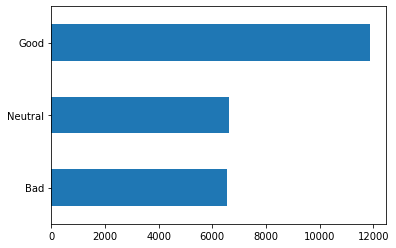

In [28]:
# df_tree_categories['target'].plot.bar(bins=12, alpha=0.5)
df['tri_target'].value_counts().sort_values().plot(kind = 'barh')


###  Logistic Regressiom

In [29]:
ld_tri_class =clf( LogisticRegression(), 'Reviews_tokenize_join', 'tri_target')


In [30]:
ld_tri_class 

{'Model': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='warn', n_jobs=None, penalty='l2',
                    random_state=None, solver='warn', tol=0.0001, verbose=0,
                    warm_start=False),
 'Accuracy_score': 0.7161676646706587,
 'Recall_score': array([0.81954887, 0.88579627, 0.32432432]),
 'Precision_score': array([0.80225711, 0.71491431, 0.56945643]),
 'F1_score': array([0.81081081, 0.79123414, 0.41327489]),
 'Time': 0.002936557999873912}

### Decision Tree Classifier

In [203]:
dt_tri_class = clf(DecisionTreeClassifier(), 'Reviews_tokenize_join', 'tri_target')

Classier:DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best') , Time: 0.004610341005900409
Accuracy: 53.4
              precision    recall  f1-score   support

         bad       0.61      0.50      0.55      1995
        good       0.61      0.66      0.64      3485
     neutral       0.33      0.35      0.34      2035

    accuracy                           0.53      7515
   macro avg       0.52      0.50      0.51      7515
weighted avg       0.54      0.53      0.53      7515



In [ ]:
dt_tri_class

### Mutinomial NB

In [204]:
nb_tri_class = clf(MultinomialNB(), 'Reviews_tokenize_join', 'tri_target')

Classier:MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) , Time: 0.0046771149936830625
Accuracy: 65.38
              precision    recall  f1-score   support

         bad       0.87      0.68      0.77      1995
        good       0.60      0.98      0.75      3485
     neutral       0.47      0.06      0.11      2035

    accuracy                           0.65      7515
   macro avg       0.65      0.58      0.54      7515
weighted avg       0.64      0.65      0.58      7515



In [ ]:
nb_tri_class

### Linear Support Vector Machine with stochastic gradient descent (SGD)


In [205]:
sgd_tri_class= clf(SGDClassifier(), 'Reviews_tokenize_join', 'tri_target')

Classier:SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) , Time: 0.004174531000899151
Accuracy: 70.39
              precision    recall  f1-score   support

         bad       0.73      0.89      0.81      1995
        good       0.69      0.94      0.80      3485
     neutral       0.68      0.11      0.20      2035

    accuracy                           0.70      7515
   macro avg       0.70      0.65      0.60      7515
weighted avg       0.70      0.70      0.64      7515



### Linear Support Vector Classification

In [206]:
svc_tri_class = clf(LinearSVC(), 'Reviews_tokenize_join', 'tri_target')

Classier:LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0) , Time: 0.003260140001657419
Accuracy: 71.32
              precision    recall  f1-score   support

         bad       0.79      0.83      0.81      1995
        good       0.74      0.85      0.79      3485
     neutral       0.53      0.36      0.43      2035

    accuracy                           0.71      7515
   macro avg       0.69      0.68      0.68      7515
weighted avg       0.69      0.71      0.70      7515



In [ ]:
svc_tri_class

### Random Forest Classifier

In [207]:
rf_tri_class = clf(RandomForestClassifier(), 'Reviews_tokenize_join', 'tri_target')

Classier:RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) , Time: 0.004170633001194801
Accuracy: 62.69
              precision    recall  f1-score   support

         bad       0.74      0.62      0.67      1995
        good       0.63      0.89      0.73      3485
     neutral       0.43      0.19      0.26      2035

    accuracy                           0.63      7515
   macro avg       0.60      0.57      0.56      7515
weighted avg       0.60      0.63      0.59      7515



In [ ]:
rf_tri_class

## Tunning hyperparameters

### Loigistic Regression

In [249]:
lg_tri_grid = clf_grid(LogisticRegression(),'Reviews_tokenize_join', 'tri_target', parameteres ={'clf__penalty' : ['l1', 'l2'],
# 'clf__C' : [ 0.001, 0.01, 0.1, 1, 10, 100],
# 'clf__solver': ['liblinear', 'saga']})

accuracy:0.7161676646706587
Best parameters : {'clf__C': 1, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}


In [210]:
clf_grid(df_tree_categories, LogisticRegression(),'Reviews_tokenize_join', 'tri_target',parameters_lg)

accuracy:0.7161676646706587
Best parameters : {'clf__C': 1}


### Decision Tree Classifier

In [ ]:
dt_tri_grid = clf_grid( DecisionTreeClassifier(),'Reviews_tokenize_join', 'tri_target', parameteres = {
#     'clf__criterion': ['gini', 'entropy'],
#     'clf__max_depth': [None, 2, 3, 4, 5, 6],
#     'clf__min_samples_split': [2, 5, 10],
#     'clf__min_samples_leaf': [1, 2, 3, 4, 5, 6]
# })

### Multinomial NB

In [211]:
nb_tri_grid = clf_grid( MultinomialNB(),'Reviews_tokenize_join', 'tri_target', parameteres = {'clf__alpha': np.linspace(0.5, 1.5, 6), 'clf__fit_prior': [True, False]})

<IPython.core.display.Javascript object>

accuracy:0.7153692614770459
Best parameters : {'clf__alpha': 0.5, 'clf__fit_prior': False}


### Linear Support Vector Classification

In [213]:
svc_tri_grid = clf_grid( LinearSVC() , 'Reviews_tokenize_join', 'tri_target',parameteres = {'clf__C':[0.001,0.1,10,100,10e5], 'clf__max_iter':[1000, 2000,3000]})

accuracy:0.7166999334664005
Best parameters : {'clf__C': 0.1, 'clf__max_iter': 1000}


### Random Forest Classifier

In [ ]:
rf_tri_grid = clf_grid( RandomForestClassifier(), 'Reviews_tokenize_join', 'tri_target', parameteres = {
#     'clf__n_estimators': [10, 30, 100],
#     'clf__criterion': ['gini', 'entropy'],
#     'clf__max_depth': [None, 2, 6, 10],
#     'clf__min_samples_split': [5, 10],
#     'clf__min_samples_leaf': [3, 6]
# })

## Change target to 2 categories


The last model is not bad but I think It can improve if I implement binary classification.
Divide the df into 5 stars as Good and the rest as Bad.

In [35]:
df['bi_target'] = 'Bad'
df.loc[df['review_rating'] == 5, 'bi_target'] = 'Good'

In [37]:
df.binamial_target.value_counts(normalize = True)
df.head()

,review_rating,Reviews_tokenize_join,target,tri_target,binamial_target,bi_target
0,1,start say understand hard time city country en...,1,Bad,Bad,Bad
1,5,wonderful visit time park view thank upgrade l...,5,Good,Good,Good
2,5,good hotel stay absolutely worth money view ce...,5,Good,Good,Good
3,5,fantastic location spot step central park view...,5,Good,Good,Good
4,5,amazing park view nicole staff professional fr...,5,Good,Good,Good


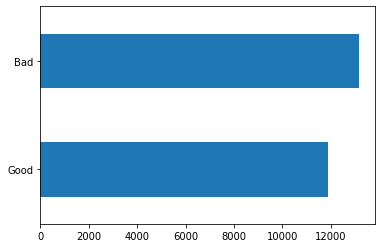

In [265]:
df['bi_target'].value_counts().sort_values().plot(kind = 'barh')


## Data Engineering and Modelling


### Logistic Regression

In [ ]:
lg_bi_class = clf(LogisticRegression(), 'Reviews_tokenize_join', 'bi_target')

In [ ]:
lg_bi_class

### Decision Tree Classifier

In [ ]:
dt_bi_class = clf(DecisionTreeClassifier(), 'Reviews_tokenize_join', 'bi_target')

In [ ]:
dt_bi_class

### Multinoial NB

In [270]:
nb_bi_class = clf(MultinomialNB(), 'Reviews_tokenize_join', 'bi_target')

Classier:MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True) , Time: 0.003956167995056603
Accuracy: 80.41
              precision    recall  f1-score   support

         Bad       0.83      0.80      0.81      4030
        Good       0.78      0.81      0.79      3485

    accuracy                           0.80      7515
   macro avg       0.80      0.80      0.80      7515
weighted avg       0.81      0.80      0.80      7515



In [ ]:
nb_bi_class

In [271]:
sgd_bi_class = clf(SGDClassifier(), 'Reviews_tokenize_join', 'bi_target')

Classier:SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False) , Time: 0.0029596269960165955
Accuracy: 80.56
              precision    recall  f1-score   support

         Bad       0.84      0.79      0.81      4030
        Good       0.77      0.82      0.80      3485

    accuracy                           0.81      7515
   macro avg       0.81      0.81      0.81      7515
weighted avg       0.81      0.81      0.81      7515



In [ ]:
sgd_bi_class 

### Linear Support Vector Classification

In [272]:
svc_bi_class = clf(LinearSVC(), 'Reviews_tokenize_join', 'bi_target')

Classier:LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0) , Time: 0.003953686995373573
Accuracy: 80.49
              precision    recall  f1-score   support

         Bad       0.83      0.79      0.81      4030
        Good       0.77      0.82      0.80      3485

    accuracy                           0.80      7515
   macro avg       0.80      0.81      0.80      7515
weighted avg       0.81      0.80      0.81      7515



In [ ]:
svc_bi_class

In [ ]:
rf_bi_grid = clf_grid( RandomForestClassifier(), 'Reviews_tokenize_join', 'bi_target')

In [ ]:
rf_bi_grid

## Tunning hyperparameters

### Logistic Regression

In [ ]:
lg_bi_grid = clf_grid(LogisticRegression(),'Reviews_tokenize_join', 'bi_target', parameteres ={'clf__penalty' : ['l1', 'l2'],


In [ ]:
lg_bi_grid

### Decision Tree Classifier

In [ ]:
dt_bi_grid = clf_grid( DecisionTreeClassifier(),'Reviews_tokenize_join', 'bi_target', parameteres = {
#     'clf__criterion': ['gini', 'entropy'],
#     'clf__max_depth': [None, 2, 3, 4, 5, 6],
#     'clf__min_samples_split': [2, 5, 10],
#     'clf__min_samples_leaf': [1, 2, 3, 4, 5, 6]
# })

In [ ]:
dt_bi_grid

### Multinomial NB

In [ ]:
nb_bi_grid = clf_grid( MultinomialNB(),'Reviews_tokenize_join', 'bi_target', parameteres = {'clf__alpha': np.linspace(0.5, 1.5, 6), 'clf__fit_prior': [True, False]})

In [ ]:
nb_bi_grid 

### Linear Support Vector Classification

In [ ]:
svc_bi_grid = clf_grid( LinearSVC() , 'Reviews_tokenize_join', 'bi_target',parameteres = {'clf__C':[0.001,0.1,10,100,10e5], 'clf__max_iter':[1000, 2000,3000]})

In [ ]:
svc_bi_grid

### Random Forest Classifier

In [ ]:
rf_bi_grid = clf_grid( RandomForestClassifier(), 'Reviews_tokenize_join', 'bi_target', parameteres = {
#     'clf__n_estimators': [10, 30, 100],
#     'clf__criterion': ['gini', 'entropy'],
#     'clf__max_depth': [None, 2, 6, 10],
#     'clf__min_samples_split': [5, 10],
#     'clf__min_samples_leaf': [3, 6]
# })

In [ ]:
rf_bi_grid

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Reviews_tokenize_join'] ,df['target'], test_size=0.3, random_state = 42)

pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
                     ('chi',  SelectKBest(chi2, k=10000)),
                     ('clf', LinearSVC())])

In [87]:
parameteres = {'clf__C':[0.001,0.1,10,100,10e5], 'clf__max_iter':[1000, 2000,3000]}

In [88]:
grid = GridSearchCV(pipeline, param_grid=parameteres, cv=5)


In [89]:
grid.fit(X_train, y_train)


/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('vect',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 2),
                                          

In [90]:
print(grid.score(X_test,y_test))

0.6217564870259481


In [91]:
grid.best_params_

{'clf__C': 0.1, 'clf__max_iter': 1000}

In [92]:
clf(LinearSVC(C=0.1, penalty='l1', max_iter=1000, dual=False))

<IPython.core.display.Javascript object>

Mean Cross Validation Score: 56.49%
Classier:LinearSVC(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=0.0001,
          verbose=0) , Time: 0.0035134449990437133
Accuracy: 0.5720558882235529
              precision    recall  f1-score   support

           1       0.52      0.49      0.50       509
           2       0.33      0.03      0.05       560
           3       0.35      0.12      0.17       926
           4       0.42      0.35      0.38      2035
           5       0.65      0.92      0.76      3485

    accuracy                           0.57      7515
   macro avg       0.45      0.38      0.37      7515
weighted avg       0.52      0.57      0.51      7515



In [93]:
clf(LinearSVC(C=0.1, max_iter=1000))

<IPython.core.display.Javascript object>

Mean Cross Validation Score: 59.54%
Classier:LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0) , Time: 0.004986515999917174
Accuracy: 0.5984031936127745
              precision    recall  f1-score   support

           1       0.55      0.61      0.57       509
           2       0.40      0.04      0.08       560
           3       0.40      0.23      0.29       926
           4       0.48      0.37      0.41      2035
           5       0.67      0.92      0.77      3485

    accuracy                           0.60      7515
   macro avg       0.50      0.43      0.43      7515
weighted avg       0.56      0.60      0.55      7515



In [94]:
clf(LinearSVC())

<IPython.core.display.Javascript object>

Mean Cross Validation Score: 60.98%
Classier:LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0) , Time: 0.006638550999923609
Accuracy: 0.6087824351297405
              precision    recall  f1-score   support

           1       0.54      0.59      0.56       509
           2       0.35      0.14      0.20       560
           3       0.40      0.36      0.38       926
           4       0.50      0.41      0.45      2035
           5       0.72      0.87      0.79      3485

    accuracy                           0.61      7515
   macro avg       0.50      0.47      0.48      7515
weighted avg       0.58      0.61      0.59      7515



In [8]:
model = pipeline.fit(X_train, y_train)


In [9]:
print("accuracy score: " + str(model.score(X_test, y_test)))


accuracy score: 0.6171656686626746


In [13]:
vectorizer = model.named_steps['vect']
chi = model.named_steps['chi']
clf = model.named_steps['classifier']


In [17]:

feature_names = vectorizer.get_feature_names()
feature_names = [feature_names[i] for i in chi.get_support(indices=True)]
feature_names = np.asarray(feature_names)
feature_names[:10]

<IPython.core.display.Javascript object>

array(['aand price', 'able coffee', 'able comfortable', 'able complain',
       'able cook', 'able manually', 'able rebook', 'able suitcase',
       'able text', 'able toilet'], dtype='<U28')

In [15]:
target_names = ['1', '2', '3', '4', '5']
print("top 10 keywords per class:")
for i, label in enumerate(target_names):
    top10 = np.argsort(clf.coef_[i])[-10:]
    print("%s: %s" % (label, " ".join(feature_names[top10])))

top 10 keywords per class:


<IPython.core.display.Javascript object>

1: total cost horrible ruin uncleaned experience superb avoid cost stay away disgusting bed uncomfortable bad


<IPython.core.display.Javascript object>

2: work leak sink didn book site like hadn rudest shoddy wasn worth soil feel dirty maze


<IPython.core.display.Javascript object>

3: room rude average average experience worth lobby date staff tall building pro despite request problem need leave floor


<IPython.core.display.Javascript object>

4: attend opera lobby large good reasonable overall location downside reason didn simple clean excellent right general good drawback


<IPython.core.display.Javascript object>

5: perfect love worth penny andrew grateful absolutely stay emanuel exceed impressed overall excellent


In [ ]:
## limpiar la data quetar names como did